## Challange: Preparing a Data Set for Modeling

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import math
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.columns

Index(['TextID', 'URL', 'Label', 'totalWordsCount', 'semanticobjscore',
       'semanticsubjscore', 'CC', 'CD', 'DT', 'EX', 'FW', 'INs', 'JJ', 'JJR',
       'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP',
       'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TOs', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'baseform',
       'Quotes', 'questionmarks', 'exclamationmarks', 'fullstops', 'commas',
       'semicolon', 'colon', 'ellipsis', 'pronouns1st', 'pronouns2nd',
       'pronouns3rd', 'compsupadjadv', 'past', 'imperative', 'present3rd',
       'present1st2nd', 'sentence1st', 'sentencelast', 'txtcomplexity'],
      dtype='object')

In [4]:
df['semanticobjscore'].describe()

count    1000.000000
mean       39.005000
std        32.134835
min         0.000000
25%        13.000000
50%        33.000000
75%        56.000000
max       237.000000
Name: semanticobjscore, dtype: float64

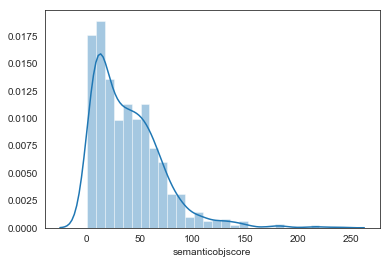

In [5]:
sns.set_style('white')
sns.distplot(df['semanticobjscore']);

In [6]:
print("Skewness: %f" % df['semanticobjscore'].skew())
print("Kurtosis: %f" % df['semanticobjscore'].kurt())

Skewness: 1.610422
Kurtosis: 4.484206


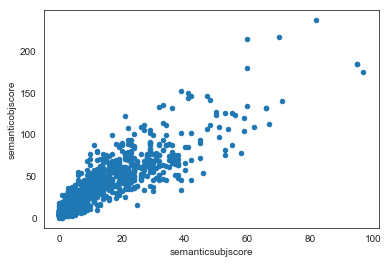

In [7]:
var = 'semanticsubjscore'
data = pd.concat([df['semanticobjscore'], df[var]], axis=1)
data.plot.scatter(x=var, y='semanticobjscore')

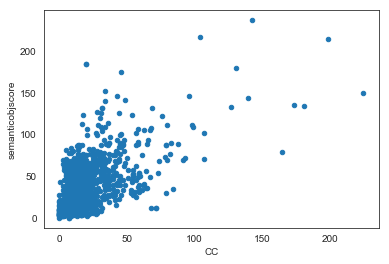

In [8]:
var = 'CC'
data = pd.concat([df['semanticobjscore'], df[var]], axis=1)
data.plot.scatter(x=var, y='semanticobjscore')

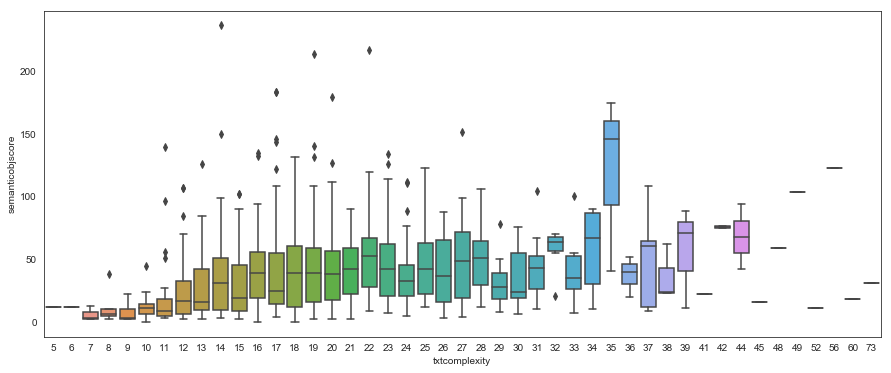

In [9]:
var = 'txtcomplexity'
data = pd.concat([df['semanticobjscore'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="semanticobjscore", data=data)

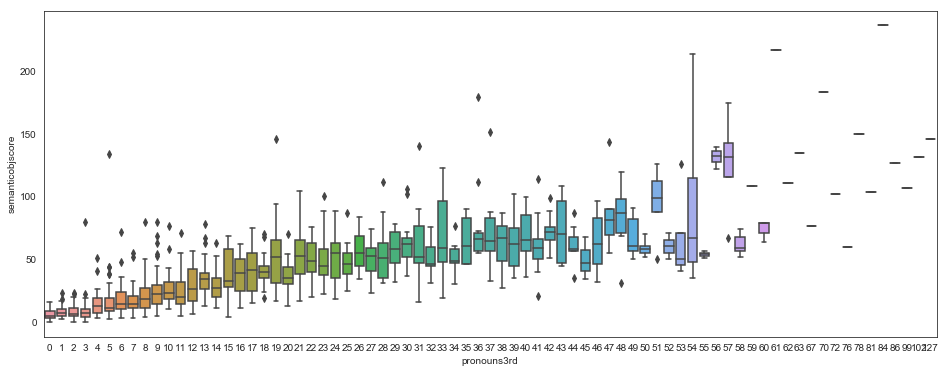

In [10]:
var = 'pronouns3rd'
data = pd.concat([df['semanticobjscore'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 6))
fig = sns.boxplot(x=var, y='semanticobjscore', data=data)

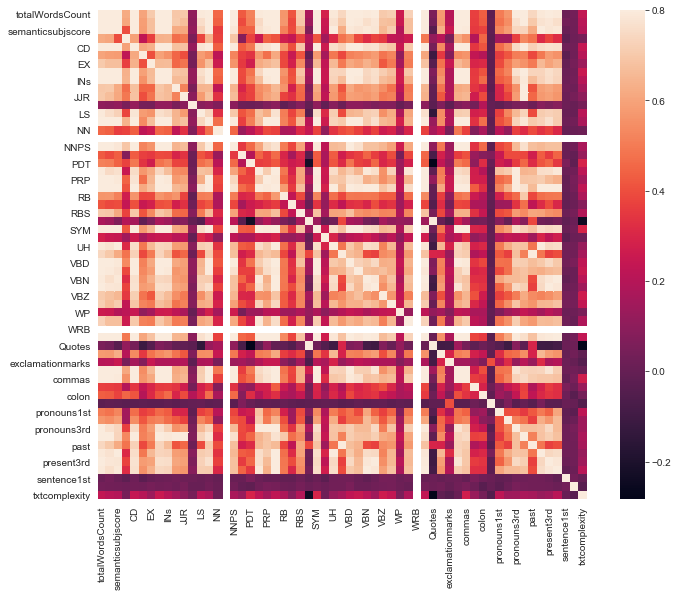

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<function matplotlib.pyplot.show(*args, **kw)>

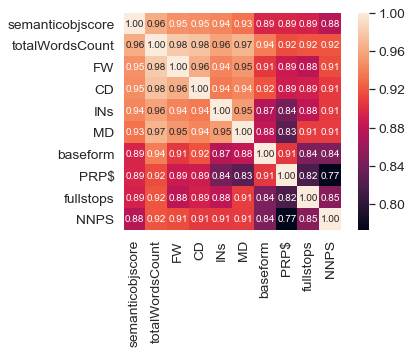

In [12]:
k = 10
cols = corrmat.nlargest(k, 'semanticobjscore')['semanticobjscore'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show

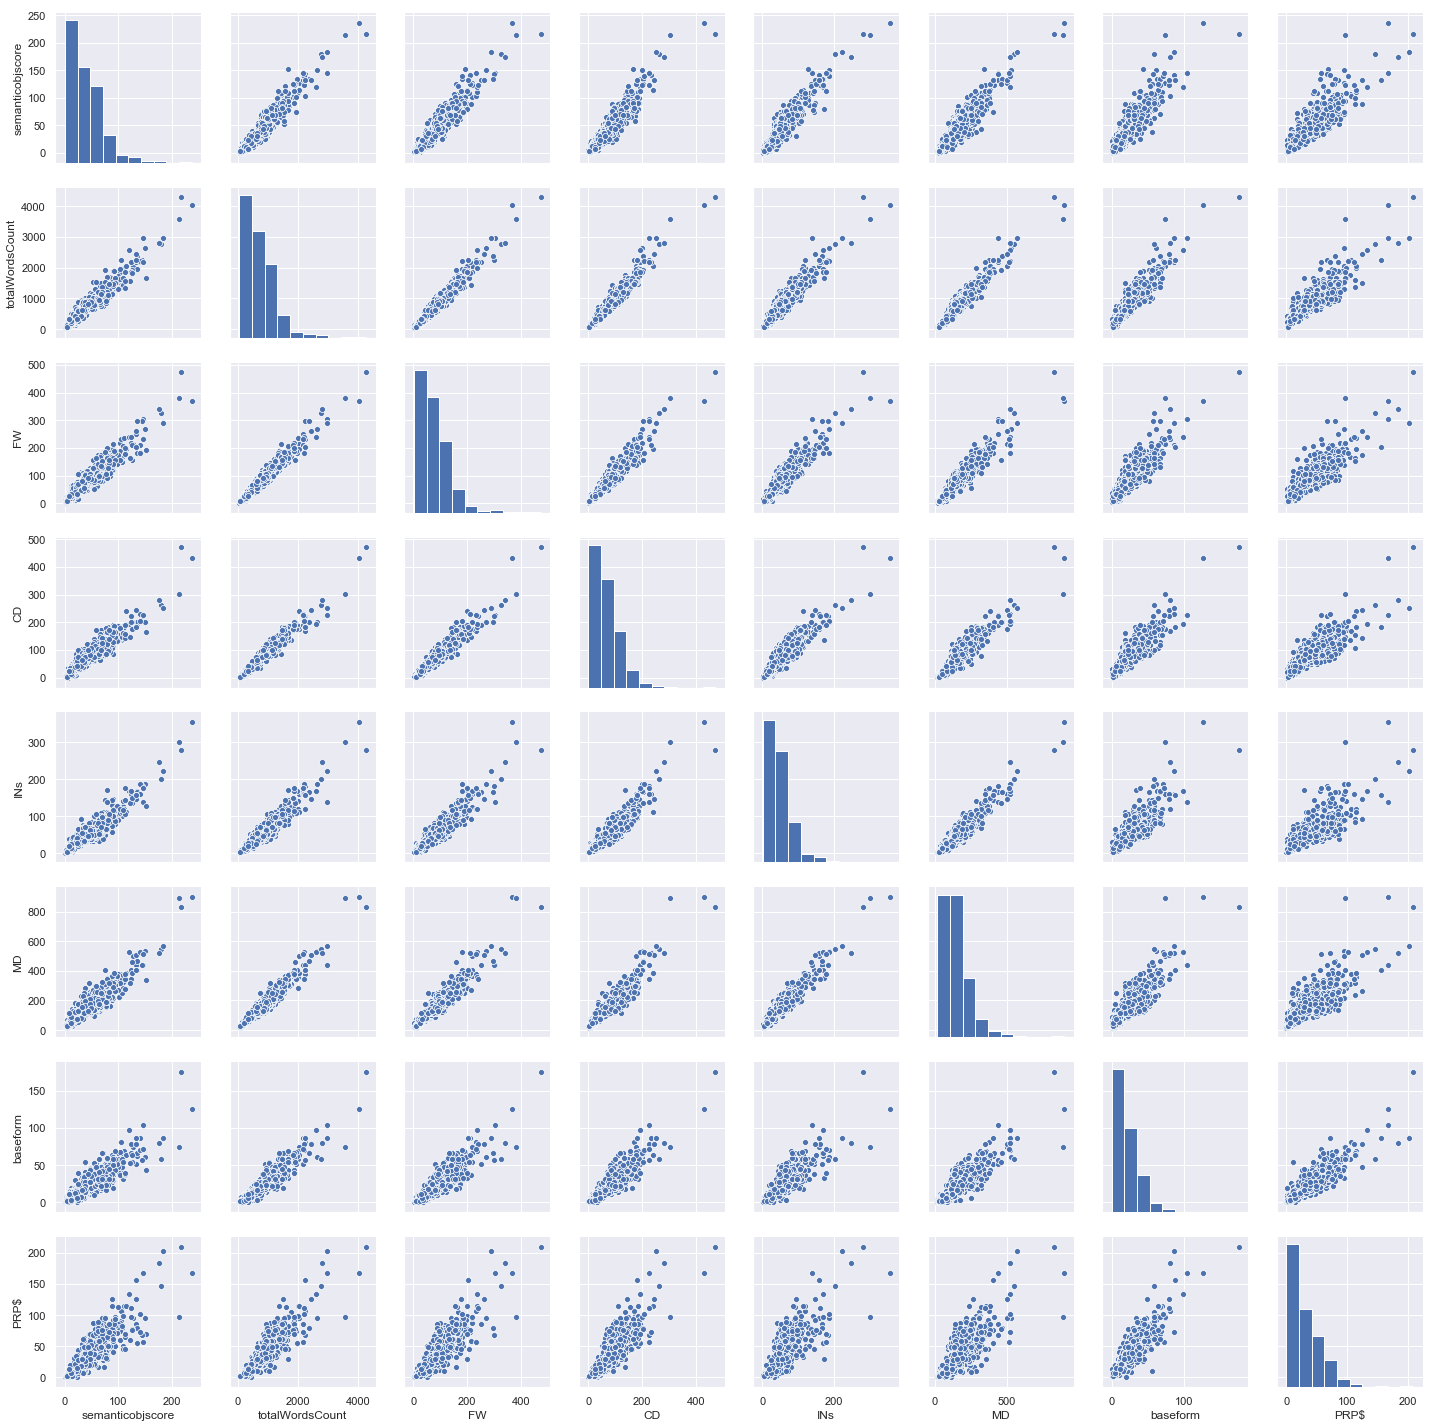

In [13]:
sns.set()
cols = ['semanticobjscore', 'totalWordsCount', 'FW', 'CD', 'INs', 'MD', 'baseform', 'PRP$']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [14]:
semanticobjscore_scaled = StandardScaler().fit_transform(df['semanticobjscore'][:,np.newaxis]);
low_range = semanticobjscore_scaled[semanticobjscore_scaled[:,0].argsort()][:10]
high_range = semanticobjscore_scaled[semanticobjscore_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.21439917]
 [-1.21439917]
 [-1.21439917]
 [-1.15213028]
 [-1.15213028]
 [-1.15213028]
 [-1.15213028]
 [-1.15213028]
 [-1.15213028]
 [-1.15213028]]

outer range (high) of the distribution:
[[3.33123035]
 [3.45576814]
 [3.51803704]
 [4.23412936]
 [4.38980161]
 [4.5143394 ]
 [4.5143394 ]
 [5.44837286]
 [5.54177621]
 [6.16446519]]


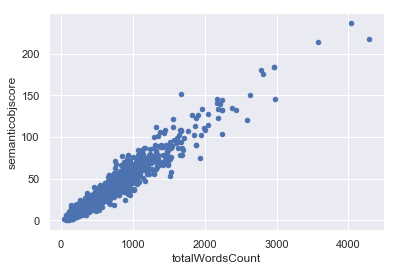

In [15]:
var = 'totalWordsCount'
data = pd.concat([df['semanticobjscore'], df[var]], axis=1)
data.plot.scatter(x=var, y='semanticobjscore')

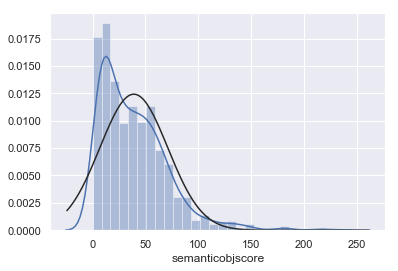

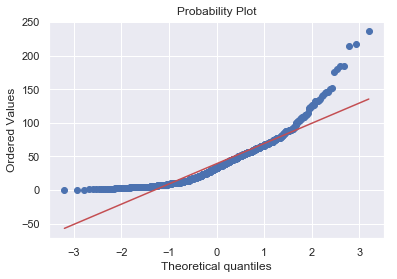

In [16]:
#compared to normal distribution 
sns.distplot(df['semanticobjscore'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['semanticobjscore'], plot=plt)

In [17]:
df['Hassemanticobjscore'] = pd.Series(len(df['semanticobjscore']), index=df.index)
df['Hassemanticobjscore'] = 0 
df.loc[df['semanticobjscore']>0,'Hassemanticobjscore'] = 1

In [18]:
df.loc[df['Hassemanticobjscore']==1,'semanticobjscore'] = np.log(df['semanticobjscore'])

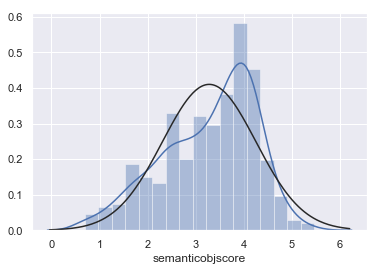

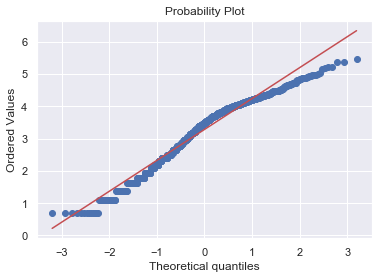

In [19]:
sns.distplot(df[df['semanticobjscore']>0]['semanticobjscore'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['semanticobjscore']>0]['semanticobjscore'], plot=plt)

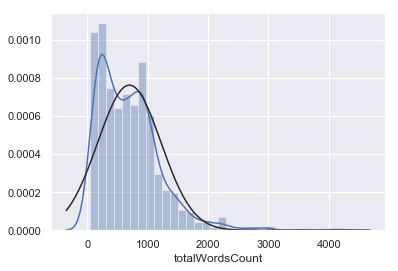

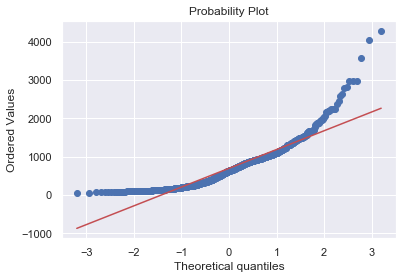

In [20]:
#USING LOG TO FIX POSITIVE SKEWNESS. IS THIS 
sns.distplot(df['totalWordsCount'], fit=norm);
fig=plt.figure()
res = stats.probplot(df['totalWordsCount'], plot=plt)

In [21]:
df['totalWordsCount'] = np.log(df['totalWordsCount'])

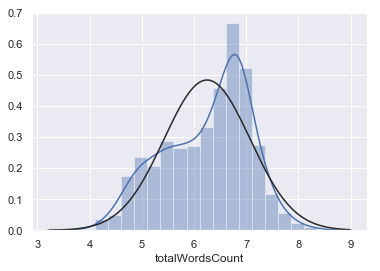

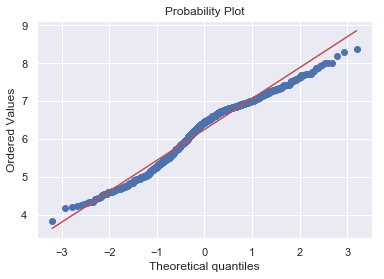

In [22]:
sns.distplot(df['totalWordsCount'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['totalWordsCount'], plot=plt)

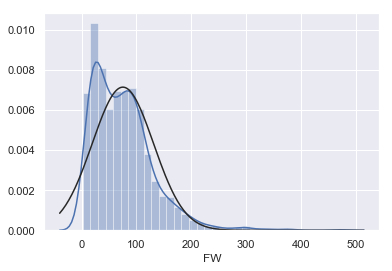

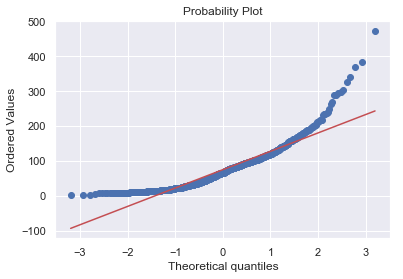

In [23]:
sns.distplot(df['FW'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['FW'], plot=plt)

In [24]:
df['FW'] = np.log(df['FW'])

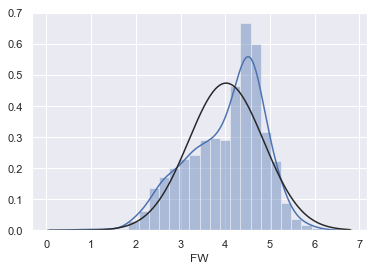

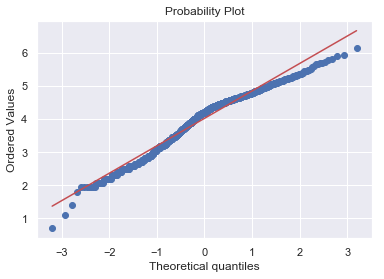

In [25]:
sns.distplot(df['FW'], fit=norm);
fig = plt.figure() 
res = stats.probplot(df['FW'], plot=plt)

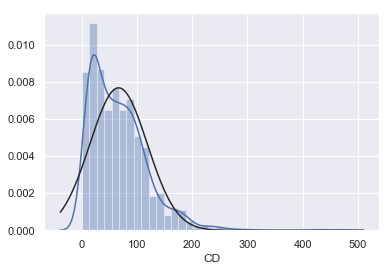

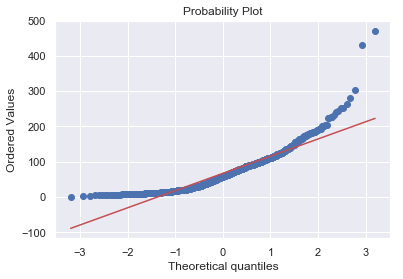

In [26]:
sns.distplot(df['CD'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CD'], plot=plt)

In [27]:
df['HASCD'] = pd.Series(len(df['CD']), index=df.index)
df['HASCD'] = 0
df.loc[df['CD']>0, 'HASCD'] = 1

In [28]:
df.loc[df['HASCD']==1, 'CD'] = np.log(df['CD'])

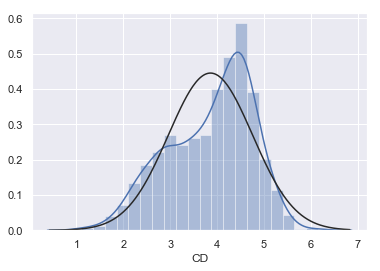

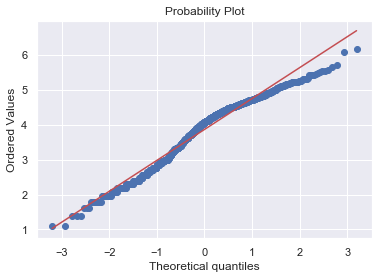

In [29]:
sns.distplot(df[df['CD']>0]['CD'], fit=norm)
fig=plt.figure()
res=stats.probplot(df[df['CD']>0]['CD'], plot=plt)

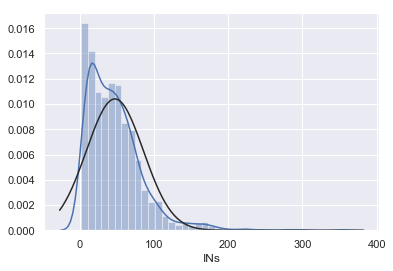

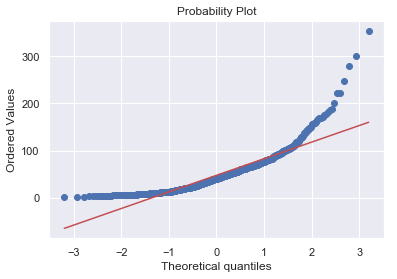

In [30]:
sns.distplot(df['INs'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['INs'], plot=plt)

In [31]:
df['INs'] = np.log(df['INs'])

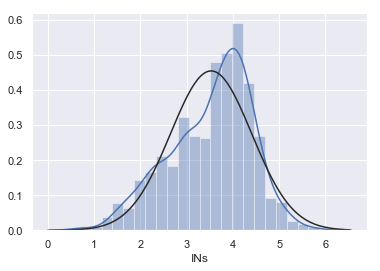

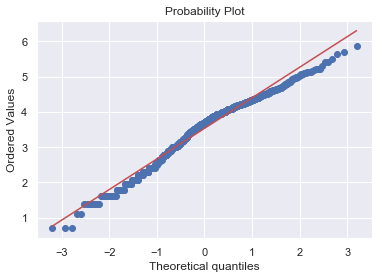

In [32]:
sns.distplot(df['INs'], fit=norm);
fig = plt.figure() 
res = stats.probplot(df['INs'], plot=plt)

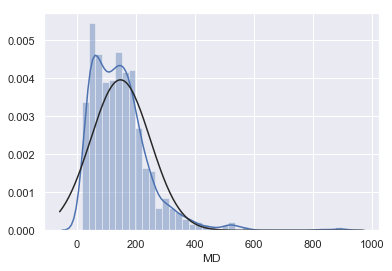

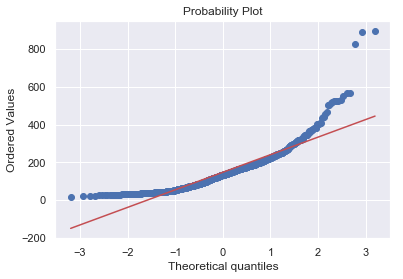

In [33]:
sns.distplot(df['MD'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['MD'], plot=plt)

In [34]:
df['MD'] = np.log(df['MD'])

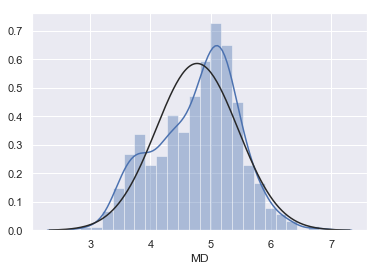

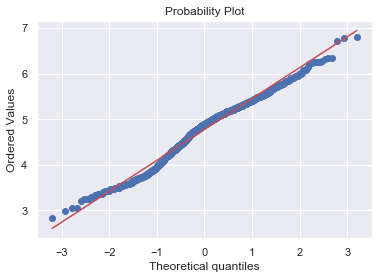

In [35]:
sns.distplot(df['MD'], fit=norm);
fig = plt.figure() 
res = stats.probplot(df['MD'], plot=plt)

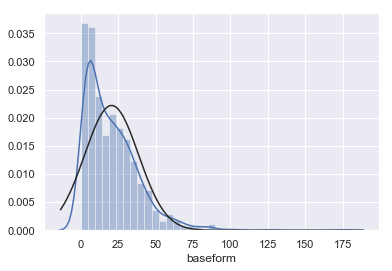

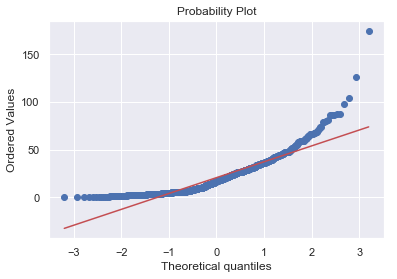

In [36]:
sns.distplot(df['baseform'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['baseform'], plot=plt)

In [37]:
df['HASbaseform'] = pd.Series(len(df['baseform']), index=df.index)
df['HASbsaeform'] = 0
df.loc[df['baseform']>0, 'HASbaseform'] = 1

In [38]:
df.loc[df['HASbaseform']==1, 'baseform'] = np.log(df['baseform'])

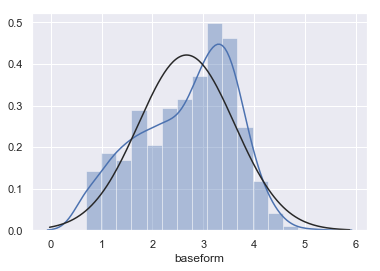

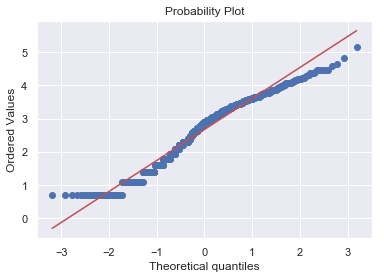

In [39]:
sns.distplot(df[df['baseform']>0]['baseform'], fit=norm)
fig=plt.figure()
res=stats.probplot(df[df['baseform']>0]['baseform'], plot=plt)

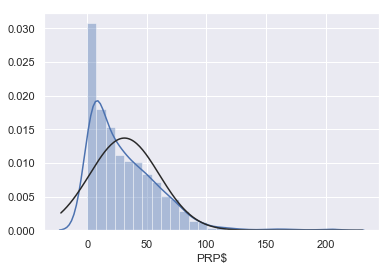

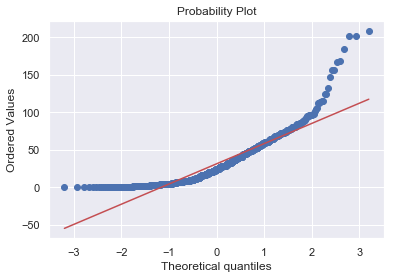

In [40]:
sns.distplot(df['PRP$'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['PRP$'], plot=plt)

In [41]:
df['HASPRP$'] = pd.Series(len(df['PRP$']), index=df.index)
df['HASPRP$'] = 0
df.loc[df['PRP$']>0, 'HASPRP$'] = 1

In [42]:
df.loc[df['HASPRP$']==1, 'PRP$'] = np.log(df['PRP$'])

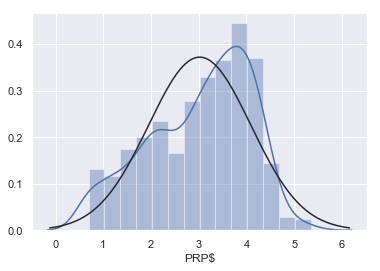

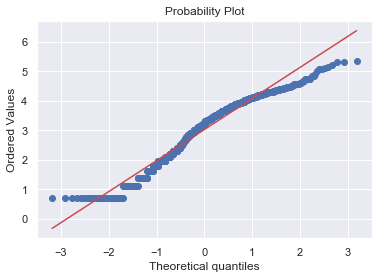

In [43]:
sns.distplot(df[df['PRP$']>0]['PRP$'], fit=norm);
fig=plt.figure()
res = stats.probplot(df[df['PRP$']>0]['PRP$'], plot=plt)

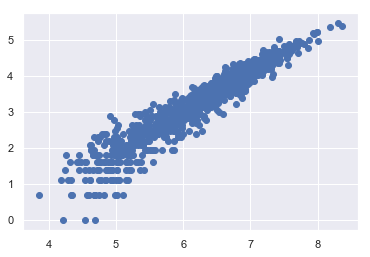

In [44]:
plt.scatter(df['totalWordsCount'], df['semanticobjscore']);

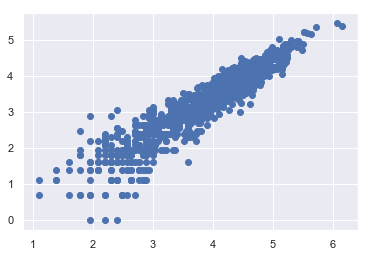

In [45]:
plt.scatter(df[df['CD']>0]['CD'], df[df['CD']>0]['semanticobjscore']);

In [46]:
sns.set_style("white")

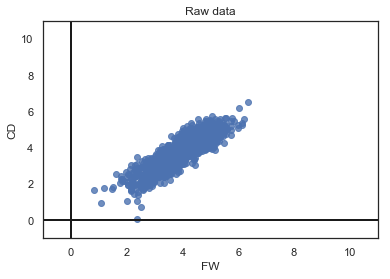

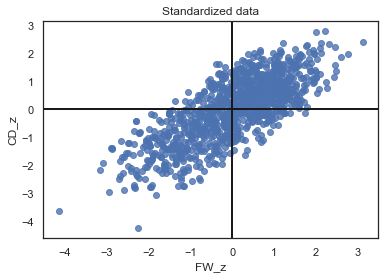

In [54]:
df_pca = df.loc[
    ((df['Label'] == 'objective') | (df['Label'] == 'subjective')),
    ['totalWordsCount','FW','CD','INs', 'MD']
].dropna()

t = sns.regplot(
    'FW',
    'CD',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['FW_z'] = (df_pca['FW'] - df_pca['FW'].mean()) / df_pca['FW'].std()
df_pca['CD_z'] = (df_pca['CD'] - df_pca['CD'].mean()) / df_pca['CD'].std()

t = sns.regplot(
    'FW_z',
    'CD_z',
    df_pca,
    x_jitter=.90,
    y_jitter=.90,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

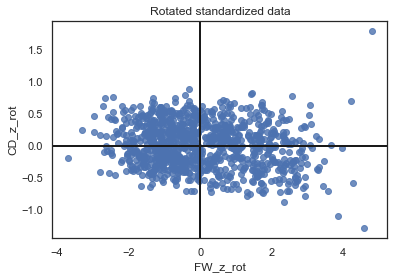

In [57]:
df_pca['FW_z_rot'] = math.cos(40) * df_pca['FW_z'] - math.sin(40) * df_pca['CD_z']
df_pca['CD_z_rot'] = math.sin(40) * df_pca['FW_z'] + math.cos(40) * df_pca['CD_z']

t = sns.regplot(
    'FW_z_rot',
    'CD_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()


In [58]:
df_pca = df.loc[
    ((df['Label'] == 'objective') | (df['Label'] == 'subjective')),
    ['totalWordsCount','FW','CD','INs', 'MD'] 
].dropna()

X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[1.001001   0.97955699 0.97554287 0.95843851 0.97375067]
 [0.97955699 1.001001   0.96660325 0.93960664 0.95806301]
 [0.97554287 0.96660325 1.001001   0.93697168 0.94791334]
 [0.95843851 0.93960664 0.93697168 1.001001   0.94334859]
 [0.97375067 0.95806301 0.94791334 0.94334859 1.001001  ]]


In [60]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.45234713]
 [0.44833118]
 [0.44676587]
 [0.44217843]
 [0.44638516]]
Eigenvalue 1: 4.833177144456002
----------------------------------------
Eigenvector 2: 
[[-0.88508461]
 [ 0.28249872]
 [ 0.24683914]
 [ 0.11859795]
 [ 0.24864568]]
Eigenvalue 2: 0.014300422520583736
----------------------------------------
Eigenvector 3: 
[[ 0.10363164]
 [ 0.34887599]
 [ 0.40248079]
 [-0.83955218]
 [-0.02659648]]
Eigenvalue 3: 0.07294182293014057
----------------------------------------
Eigenvector 4: 
[[ 0.03128031]
 [-0.06465983]
 [-0.49729118]
 [-0.28724372]
 [ 0.81549567]]
Eigenvalue 4: 0.052070300922089606
----------------------------------------
Eigenvector 5: 
[[-0.01700979]
 [-0.77025858]
 [ 0.57461413]
 [-0.05528055]
 [ 0.27050888]]
Eigenvalue 5: 0.03251531417619091
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.96566879 0.00285722 0.01457378 0.01040365 0.00649656]


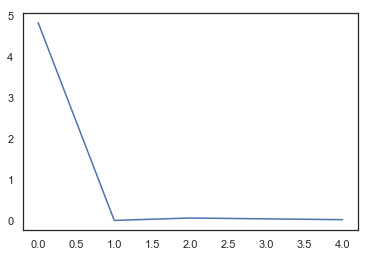

In [61]:
plt.plot(eig_val_cov)
plt.show()

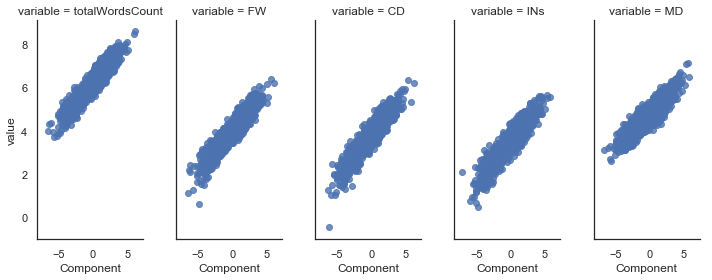

In [62]:
P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

data_to_plot = df_pca[['totalWordsCount','FW','CD','INs', 'MD']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.96566879 0.01457378 0.01040365 0.00649656 0.00285722]


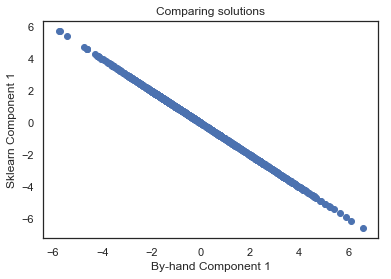

In [66]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()